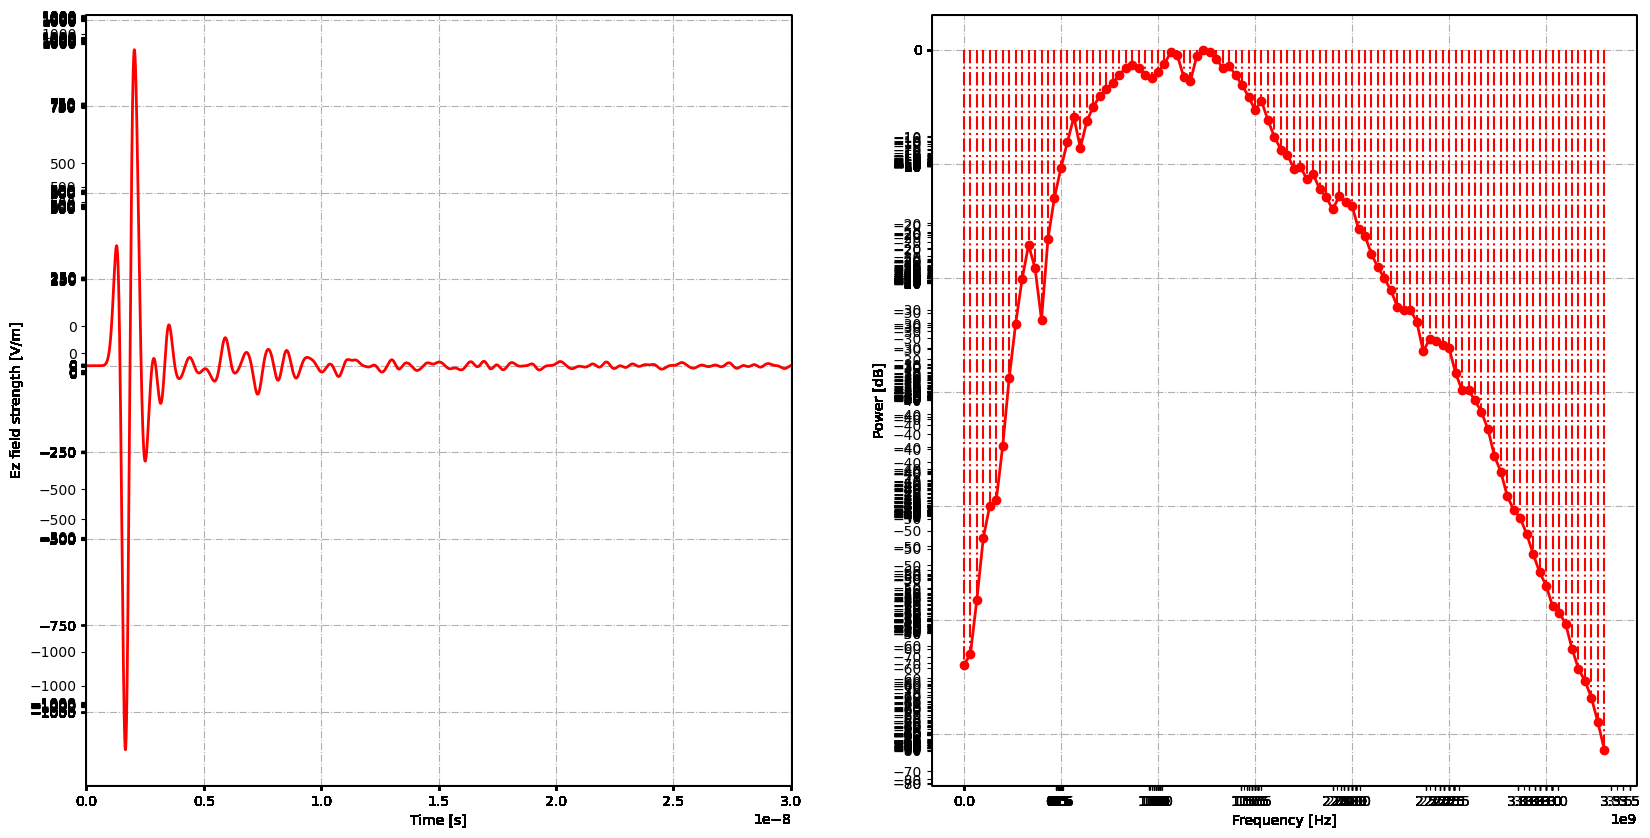

In [1]:
import h5py
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
prefix_1 = 'imgrot_'
prefix_2 = 'srcrot_'

# Select the Ascan index for the comparison
ascan_index = 1
for ascan_index in range(1,37):
    with h5py.File('{}0{}.out'.format(prefix_1, ascan_index), 'r') as f1:
        data1 = f1['rxs']['rx1']['Ez'][()]
        dt = f1.attrs['dt']

    with h5py.File('{}0{}.out'.format(prefix_2, ascan_index), 'r') as f2:
        data2 = f2['rxs']['rx1']['Ez'][()]

    # Calculate the Structural Similarity Index (SSI)
    ssi_value = ssim(data1, data2, data_range=data1.max() - data1.min())

    # Convert the SSI value to a percentage similarity
    percentage_similarity = (ssi_value + 1) * 50

    # Print the similarity value
    print("Ascan {} similarity = {:.2f}%".format(ascan_index, percentage_similarity))
    from gprMax.receivers import Rx
    outputs = Rx.defaultoutputs
    outputs = ['Ez']
    from tools.plot_Ascan import mpl_plot
    plt_1 = mpl_plot('{}0{}.out'.format(prefix_2, ascan_index), outputs, fft=True)
    plt_2 = mpl_plot('{}0{}.out'.format(prefix_1, ascan_index), outputs, fft=True)
